In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [202]:
# veri setini içeri aktarıyoruz
data = pd.read_csv("dataset.csv")

In [203]:
# veri seti hakkında bazı bilgiler edindiğimiz fonksiyon
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [204]:
# info ile aldığımız genel bilgiye dair başka bir özet sunar. Her bir değişkenden kaç adet olduğu veya bu değişkenlerin değerlerinin kaça ayrıldığı gibi
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [205]:
# Veri setimizin ilk 5 satırını gösterir.
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


---

##### **Data Cleaning**

In [206]:
# verisetimizden drop ile "Unnamed: 0" sütununu siliyoruz.
data = data.drop(columns="Unnamed: 0")

data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


- Sadece index değerlerini tutan ve analizimize katkısı olmayan **Unnamed 0** sütununu siliyoruz.

In [207]:
duplicate_rows = data.duplicated()
duplicate_rows[duplicate_rows == True]

1925      True
2155      True
3738      True
4648      True
5769      True
          ... 
111246    True
111362    True
111980    True
112968    True
113345    True
Length: 450, dtype: bool

- Veri setimizdeki tekrarlayan satırları listeledik.

- Veri setimizde **450** adet tekrarlayan satır varmış. 

In [208]:
# tekrarlayan satırları siliyoruz.
data = data.drop_duplicates()

In [209]:
duplicate_rows = data.duplicated()
duplicate_rows[duplicate_rows == True]

Series([], dtype: bool)

In [210]:
data.shape

(113550, 20)

- Tekrarlayan satırları sildikten sonra veri setimizde kalan satır sayısı **113550** miş.

---

In [211]:
# Eksik değerleri içeren satırları missing_rows'a kaydettik.
missing_rows = data[data.isnull().any(axis=1)]

# Eksik değerleri içeren satırları yazdır.
missing_rows

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [212]:
# NaN değerler içeren satırları verisetimizden siliyoruz.
data = data.dropna()

In [213]:
missing_rows = data[data.isnull().any(axis=1)]

missing_rows

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [214]:
data.isna().sum().sum()
# Toplam NaN içeren hücre sayısı.

np.int64(0)

In [215]:
data.shape

(113549, 20)

- **NaN** değerler içeren satırları da sildikten sonra veri setimizde **113549** adet satır kaldı.

---

#### Korelasyon Matrisi

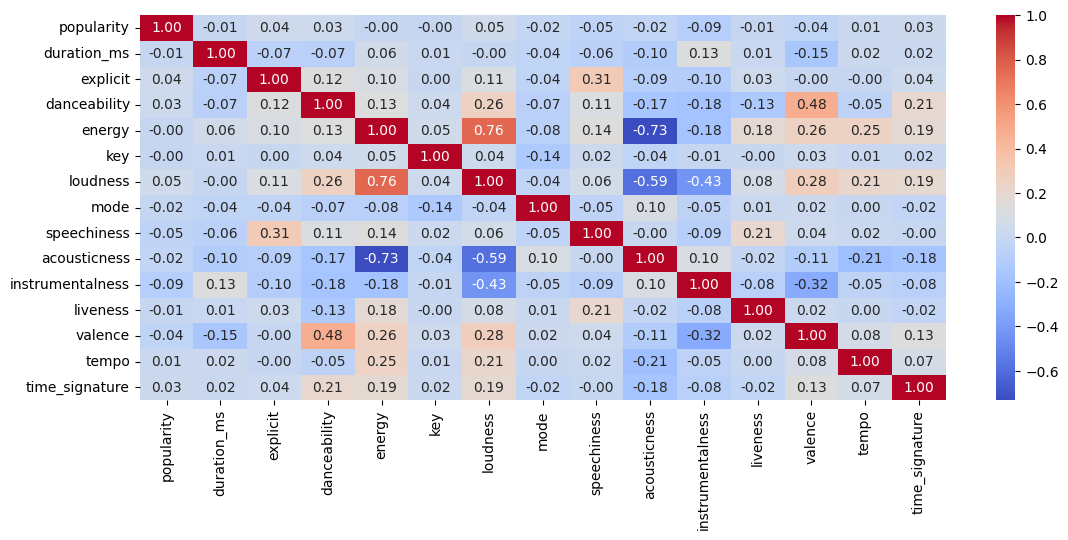

In [216]:
corr_mat=data.corr(numeric_only=True)

plt.figure(figsize=(13,5))
sns_plot=sns.heatmap(data=corr_mat, fmt='.2f', annot=True, cmap='coolwarm')
plt.show()

Korelasyon matrisinden anlaşılabileceği üzere;
- *energy* - *loudness* arasında güçlü bir pozitif korelasyon,
- *accousticness* - *energy* arasında güçlü bir negatif korelasyon var.

---

### En Popüler 5 Şarkı

In [217]:
top_tracks = data.nlargest(5, 'popularity')
top_tracks

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm


Göreceğimiz üzere her bir şarkı, birden fazla türde bulunabileceği için birden fazla türde bulunan şarkılar o türler için tekrar verisetine eklenmiş.


In [218]:
unique_tracks = data.drop_duplicates(subset=['track_name'])

İsme göre tekrar etmeyen şarkıları alırsak bu sorunu bu problem için çözebiliriz.

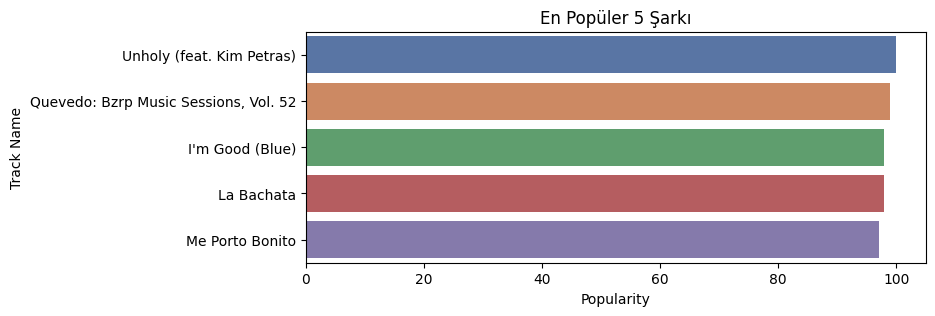

In [219]:
top_tracks = unique_tracks.nlargest(5, 'popularity')

plt.figure(figsize=(8, 3))
sns.barplot(y=top_tracks['track_name'], x=top_tracks['popularity'], palette="deep")
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.title('En Popüler 5 Şarkı')

plt.show()

---

### En Popüler 5 **track_genre**

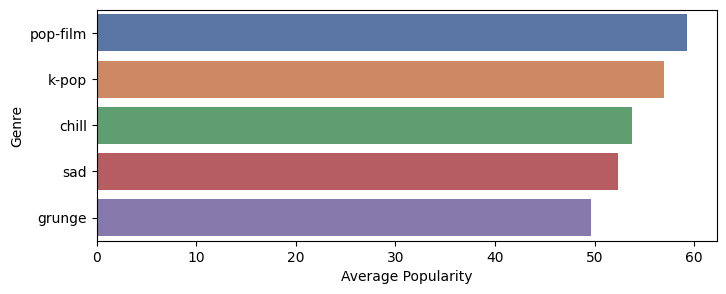

In [220]:
genre_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head()

plt.figure(figsize=(8, 3))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='deep')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

---

### **explicit** ve **non-explicit** Şarkıların Ortalama **popularity**'lerinin Birbirine Oranı

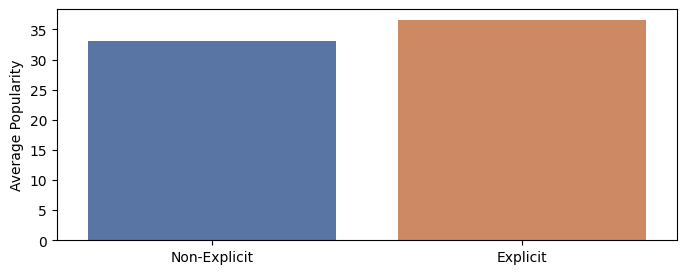

In [221]:
expl_popularity = data.groupby('explicit')['popularity'].mean()

plt.figure(figsize=(8, 3))
sns.barplot(x=expl_popularity.index, y=expl_popularity.values, palette='deep')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.ylabel('Average Popularity')
plt.xlabel('')
plt.show()

---

### **energy** ve **popularity** İlişkisi

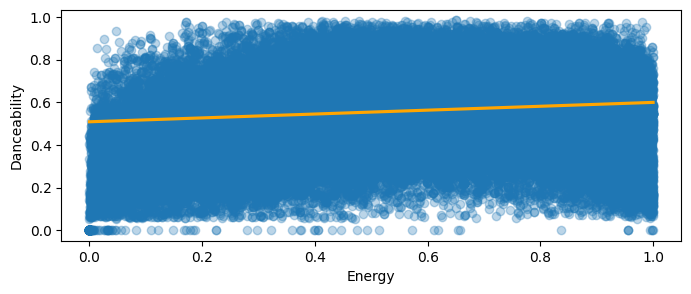

In [222]:
plt.figure(figsize=(8, 3))
sns.regplot(x=data['energy'], y=data['danceability'], scatter_kws={'alpha': 0.3}, line_kws={'color': 'orange'})
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

- Tablodan anlaşılabileceği üzere **energy** ile **popularity** arasında yüksek bir ilişki var.

---

### **Data Preprocessing**

In [223]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [224]:
# gereksiz sütunları silelim.
data = data.drop(columns=['track_id', 'artists', 'album_name', 'track_name'])

In [225]:
# yeni özellikler ekleyelim.
data['duration_min'] = data['duration_ms'] / 60000

data['energy_danceability_ratio'] = np.where(data['danceability'] > 0, data['energy'] / data['danceability'], 0)  # ya da istediğiniz başka bir değer

- Burada **duraticton_min**'i kullanarak **duraction_ms** özelliğini oluşturduk. (ms'i dk'ya dönüştürdük)
- Ek olarak **energy_dancebility_ratio** adında değeri **energy**'nin **dancebility**'ye oranı olan bir özellik oluşturduk.

In [226]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,energy_danceability_ratio
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218,3.801356,1.265959
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117,1.773552,0.871372
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143100,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000,2.903067,0.784314
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,3.550000,1.109589
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000,4.359800,1.525862
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.288250,18.927875


- Tablodan görülebileceği üzere bazı özelliklerimizin dağılımı gereksiz fazla.
- Bu dağılımı fazla olan özelliklerimizi ölçeklendirerek modellerimizi eğitmede kullanaçağımız matematiksel algoritmaların daha rahat çalışmasını sağlayabiliriz.

In [227]:
# Ölçeklendiricimizi dahil ediyoruz.
from sklearn.preprocessing import MinMaxScaler

In [228]:
scalemm = MinMaxScaler()

In [ ]:
# 'loudness_scaled' adında 'loudness'in yerini alacak özelliği ekliyoruz.
data['loudness_scaled'] = scalemm.fit_transform(data[['loudness']])

In [230]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,energy_danceability_ratio,loudness_scaled
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218,3.801356,1.265959,0.763694
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117,1.773552,0.871372,0.092696
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143100,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000,2.903067,0.784314,0.731239
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,3.550000,1.109589,0.786749
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000,4.359800,1.525862,0.823669
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.288250,18.927875,1.000000


- Tabloda görüldüğü üzere **loudness** özelliğini ölçeklendirerek **0 ile 1** arasına sığdırdık.
- **key**, **time_signature** gibi özellikler, özel değerler içerdiği için bunları ölçeklendirmeyiz!
- Aynısını **tempo** için de yapalım.

In [231]:
# tempo yu da ölçeklendiriyoruz.
data['tempo_scaled'] = scalemm.fit_transform(data[['tempo']])

In [232]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,energy_danceability_ratio,loudness_scaled,tempo_scaled
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218,3.801356,1.265959,0.763694,0.502012
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117,1.773552,0.871372,0.092696,0.123157
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143100,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000,2.903067,0.784314,0.731239,0.408001
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,3.550000,1.109589,0.786749,0.501372
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000,4.359800,1.525862,0.823669,0.575555
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.288250,18.927875,1.000000,1.000000


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   popularity                 113549 non-null  int64  
 1   duration_ms                113549 non-null  int64  
 2   explicit                   113549 non-null  bool   
 3   danceability               113549 non-null  float64
 4   energy                     113549 non-null  float64
 5   key                        113549 non-null  int64  
 6   loudness                   113549 non-null  float64
 7   mode                       113549 non-null  int64  
 8   speechiness                113549 non-null  float64
 9   acousticness               113549 non-null  float64
 10  instrumentalness           113549 non-null  float64
 11  liveness                   113549 non-null  float64
 12  valence                    113549 non-null  float64
 13  tempo                      113549 

Tabloda görüleceği üzere **track_genre** ile **explicit** hariç herşey makinenin anlayabileceği sayısal türde.

**track_genre** ile **explicit**'i makine nin anlayabileceği şekilde encode edelim.

In [234]:
data['track_genre'].unique().shape

(114,)

Yukarıdaki koddan anlaşılacağı üzere 114 tane farklı **track_genre** var.

Burada çok fazla eşsiz değerimiz olduğu için one-hot encoding kullanmak verimsizdir. (Çünkü her bir eşsiz değer için yeni sütun açmak gerekecek.)

Ben burada **label-encoding** kullanacağım.

In [235]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["track_genre"] = le.fit_transform(data["track_genre"])

In [236]:
data.tail(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,energy_danceability_ratio,loudness_scaled,tempo_scaled
113995,21,384999,False,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,113,6.416650,1.366279,0.612952,0.517705
113996,22,385000,False,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,113,6.416667,0.672414,0.577345,0.350242
113997,22,271466,False,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,113,4.524433,0.523052,0.714648,0.543933
113998,41,283893,False,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,113,4.731550,0.862010,0.714759,0.558651
113999,22,241826,False,0.526,0.487,1,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,113,4.030433,0.925856,0.727429,0.325420


Aynı şekilde **explicit** özelliği için de **label-encoding** uyguluyorum.

In [237]:
data["explicit"] = le.fit_transform(data["explicit"])

In [238]:
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,energy_danceability_ratio,loudness_scaled,tempo_scaled
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,3.844433,0.681953,0.791392,0.361245
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,2.493500,0.395238,0.597377,0.318397
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,3.513767,0.819635,0.736123,0.313643
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,3.365550,0.224060,0.573701,0.746758
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,3.314217,0.716828,0.737103,0.492863


Şimdi ise eklediğim özellikler sonrasında gereksiz hale gelen özellikleri verisetimden çıkarıyorum.

In [239]:
data = data.drop(columns=['duration_ms', 'energy', 'danceability', 'loudness', 'tempo'])

In [240]:
data.head()

,popularity,explicit,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,track_genre,duration_min,energy_danceability_ratio,loudness_scaled,tempo_scaled
0,73,0,1,0,0.1430,0.0322,0.000001,0.3580,0.715,4,0,3.844433,0.681953,0.791392,0.361245
1,55,0,1,1,0.0763,0.9240,0.000006,0.1010,0.267,4,0,2.493500,0.395238,0.597377,0.318397
2,57,0,0,1,0.0557,0.2100,0.000000,0.1170,0.120,4,0,3.513767,0.819635,0.736123,0.313643
3,71,0,0,1,0.0363,0.9050,0.000071,0.1320,0.143,3,0,3.365550,0.224060,0.573701,0.746758
4,82,0,2,1,0.0526,0.4690,0.000000,0.0829,0.167,4,0,3.314217,0.716828,0.737103,0.492863


Artık verisetimdeki tüm özellikler, makinenin anlayabileceği sayısal değerlerde.

---

### **Feature Engineering**

- Burada eğittiğim modellerle **popularity** etiketini tahmin etmeye çalışacağım.
- Sürekli veri tahmini yapacağım için uğraşacağım problem Regresyon Problemidir.

In [241]:
# X'e popularity sütunu dışındaki sütunları atıyorum
X = data.drop(columns=['popularity'])

# y'ye ise popularity sütununu atıyorum.
y = data.loc[:, ['popularity']]

In [242]:
from sklearn.preprocessing import StandardScaler

# X'i modelimiz daha kolay eğitilsin diye ölçeklendiriyorum.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [243]:
from sklearn.model_selection import train_test_split

# Verilerimizi test ve train olarak ikiye ayırıyorum.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size = 0.2, random_state = 42)

In [244]:
# Kullanacağım modelleri import ediyorum.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

In [245]:
reg_models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Linear Support Vector Regression': LinearSVR()
}

In [246]:
# modellerden gelen sonuçların tutulacağı listemiz
results = list()

# hangi algoritmanın doğruluk oranını görmemizi sağlayan isim listesi
names = list()

In [247]:
# Gelebilecek gereksiz uyarıları göstermemek için...

import warnings
warnings.filterwarnings("ignore")

In [248]:
from sklearn.metrics import mean_squared_error

# sonuçları tutacak sözlük
results_reg = {}

for model_name, model in reg_models.items():
    # model eğitimi
    model.fit(X_train, y_train)

    # verilen özelliklere (feature) göre etiket (label) tahmini
    y_pred = model.predict(X_test)

    # eğitilen regresyon modelindeki hataların hesabı
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    # hataları sözlüğe kaydediyorum.
    results_reg[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
    }

In [249]:
# eğitilen farklı modellerin hataları
results_df = pd.DataFrame(results_reg).T
results_df

,MSE,RMSE
Linear Regression,487.732165,22.084659
Logistic Regression,1587.920167,39.848716
Decision Tree Regressor,492.028861,22.181724
Random Forest Regressor,257.469524,16.045857
Linear Support Vector Regression,494.403525,22.235187


- Buradan anlaşılacağı üzere **RMSE**'si daha düşük olan **Random Forest Regressor** daha performanslı.

In [250]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# Sonuçları saklamak için listeler
results = []
names = []

# Modeller üzerinde çapraz doğrulama (cross validation)
for name, model in reg_models.items():
    kfold = model_selection.KFold(shuffle=True, n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    
    # MSE sonuçlarını pozitif hale getir
    mse_values = -cv_results
    rmse_values = np.sqrt(mse_values)

    results.append(rmse_values)
    names.append(name)

    print(f"{name} - Ortalama RMSE: {rmse_values.mean():.4f}, Standart Sapma: {rmse_values.std():.4f}")

Linear Regression - Ortalama RMSE: 21.9692, Standart Sapma: 0.0952
Logistic Regression - Ortalama RMSE: 39.8261, Standart Sapma: 0.2271
Decision Tree Regressor - Ortalama RMSE: 22.4049, Standart Sapma: 0.2200
Random Forest Regressor - Ortalama RMSE: 16.0073, Standart Sapma: 0.1071
Linear Support Vector Regression - Ortalama RMSE: 22.1415, Standart Sapma: 0.1150


- Çapraz doğrulama sonucunda **Random Forest Regressor** daha performanslı olduğu için bu model için **Hiper Parametre Optimizasyonu** yapıyorum.

In [251]:
from sklearn.model_selection import GridSearchCV

# parametre sözlüğü
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [40, 50]
}

# modeli oluşturma
rfr = RandomForestRegressor(n_jobs=-1, random_state=42)

# GridSearchCV'i oluşturma
grid_search = GridSearchCV(
    estimator=rfr, 
    param_grid=param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    verbose=2
)

# model eğitimi
grid_search.fit(X_train, y_train)

# en performanslı modeli al
best_rfr = grid_search.best_estimator_

# test verisi üzerinde tahmin yapma
y_pred = best_rfr.predict(X_test)

# hata hesabı
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'En İyi Parametreler: {grid_search.best_params_}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
En İyi Parametreler: {'max_depth': 50, 'n_estimators': 200}
MSE: 257.26813199803365
RMSE: 16.039580169007966


- Yukarıdan anlaşılacağı üzere **param_grid**'de bulunan parametreleri **GridSearchCV** ile **RandomForestRegressor** üzerinde ayrı ayrı deneyip en iyi performansı vermeye çalışan modeli aradık.
- Sonucunda bulduğumuz parametrelerin kullanımında hatada küçük bir iyileştirme bulabildik.

---

- Burada eğittiğim modellerle **explicit** etiketini tahmin etmeye çalışacağım.
- Binary veri tahmini yapacağım için uğraşacağım problem Classification Problemidir.

In [252]:
# gerekli kitaplıkları yüklüyorum

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [253]:
classf_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Linear Support Vector Classifier': LinearSVC(),
    'K-Neighbours Classifier': KNeighborsClassifier(),
    'Gaussian NB': GaussianNB()
}

In [254]:
# features ve label'i belirliyorum.

X = data.drop(columns=['explicit'])
y = data.loc[:, ['explicit']]

In [255]:
# özellikleri ölçeklendiriyorum.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [256]:
# verileri test ve train olarak 0.8'e 0.2 oranında ayırıyorum.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

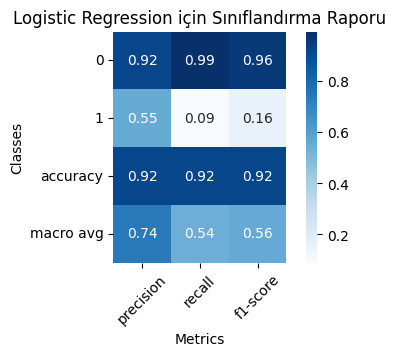

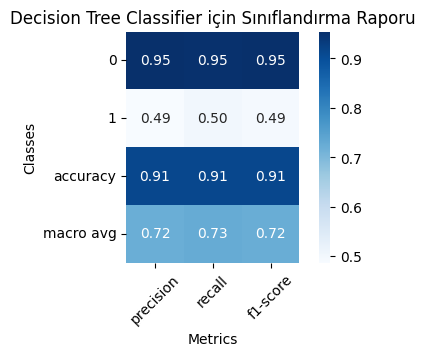

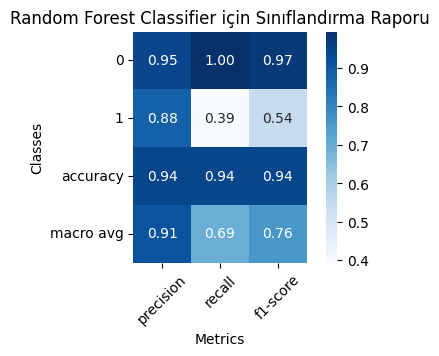

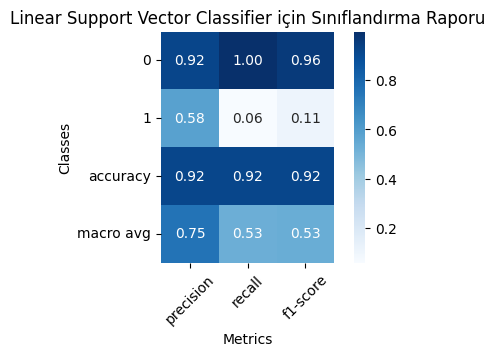

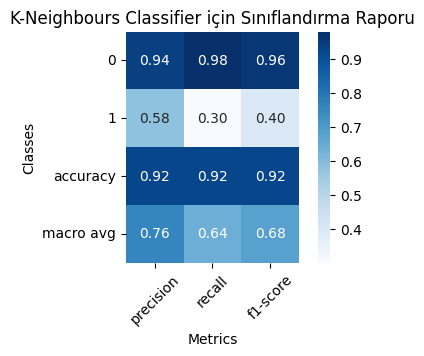

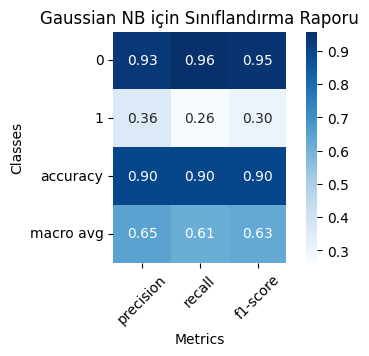

In [257]:
from sklearn.metrics import classification_report

# tahminleri tutacağımız liste
predictions = {}

for model_name, model in classf_models.items():
    # modelin eğitimi
    model.fit(X_train, y_train)

    # test veri seti ile tahmin
    y_pred = model.predict(X_test)

    # predictions listemize tahmini ekleme
    predictions[model_name] = y_pred

    # sınıflandırma raporu (sözlük tipinde)
    reporte = classification_report(y_test, y_pred, output_dict=True)

    # transpose ile satır ve sütunları değiştiriyorum
    report_df = pd.DataFrame(reporte).transpose()

    # ısı haritası oluştur
    plt.figure(figsize=(5, 3))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues', cbar=True, square=True)
    
    # başlık ve etiketler ekle
    plt.title(f'{model_name} için Sınıflandırma Raporu')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # grafiği göster
    plt.show()

Sınıflandırma raporundan anlaşılabileceği üzere;
Doğruluk (accuracy) Oranları:
1. Random Forest Classifier
2. Logistic Regression, Linear Support Vector Classifier, K-Neighbours Classifier

şeklindedir.

In [261]:
from sklearn.metrics import confusion_matrix

for model_name, prediction in predictions.items():
    print(f"{model_name}")
    print(confusion_matrix(y_test, prediction))
    print()

Logistic Regression
[[20668   138]
 [ 1732   172]]

Decision Tree Classifier
[[19798  1008]
 [  947   957]]

Random Forest Classifier
[[20704   102]
 [ 1155   749]]

Linear Support Vector Classifier
[[20725    81]
 [ 1791   113]]

K-Neighbours Classifier
[[20393   413]
 [ 1331   573]]

Gaussian NB
[[19917   889]
 [ 1402   502]]



Modellerimiz için Karışıklık Matrislerini oluşturduk.

Karışıklık Matrisine göre:
- Logistic Regression'da 20668 tane True Pozitive ve 172 tane True Negative tahminimiz var.
- Decission Tree Classifier'da 19798 tane True Pozitive ve 957 tane True Negative tahminimiz var.
- Random Forest Classifier'da 20704 tane True Pozitive ve 749 tane True Negative tahminimiz var.
- Linear Support Vector Classifier'da 20725 tane True Pozitive ve 113 tane True Negative tahminimiz var.
- K-Neighbours Classifier'da 20393 tane True Pozitive ve 573 tane True Negative tahminimiz var.
- GaussianNB'de 19917 tane True Pozitive ve 502 tane True Negative tahminimiz var.

Bunlar doğru tahmin ettiğimiz değerlerdir.

In [ ]:
# çapraz doğrulama yapalım

for name, clf in classf_models.items():
    scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Logistic Regression Accuracy: 0.91 (+/- 0.01)
Decision Tree Classifier Accuracy: 0.62 (+/- 0.55)
Random Forest Classifier Accuracy: 0.69 (+/- 0.60)
Linear Support Vector Classifier Accuracy: 0.92 (+/- 0.01)
K-Neighbours Classifier Accuracy: 0.90 (+/- 0.03)
Gaussian NB Accuracy: 0.88 (+/- 0.07)


- Çapraz Doğrulama Sonucunda:
    - **Logistic Regression**; yüksek doğruluğa ve istikrara,
    - **Decision Tree Classifier**; düşük doğruluğa ve istikrara,
    - **Random Tree Classifier**; düşük doğruluğa ve istikrara,
    - **Linear Support Vector Classifier**; yüksek doğruluğa ve istikrara,
    - **K-Neighbours Classifier**; yüksek doğruluğa ve istikrara,
    - **Gaussian NB**; yüksek doğruluğa ve istikrara sahip.

- Ben burada en yüksek doğruluğa ve istikrara sahip olan **Linear Support Vector Classifier** ile ilerliyorum.

In [263]:
from sklearn.model_selection import RandomizedSearchCV

# Linear SVC modelimi tanımladım.
svc_model = LinearSVC(max_iter=10000)

# hiperparametrelerin belirlenmesi
param_grid = {
    'C': [0.1, 1, 10],
    'loss': ['hinge'],
}

# Randomized Search ile hiperparametre optimizasyonu
random_search = RandomizedSearchCV(estimator=svc_model,
                                   param_distributions=param_grid,
                                   n_iter=5,
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=2,
                                   scoring='accuracy',
                                   random_state=42)

# modelin eğitimi
random_search.fit(X_train, y_train)

# En iyi parametreleri yazdır
print("En iyi Hiperparametreler:", random_search.best_params_)
print("En iyi doğruluk skoru:", random_search.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
En iyi Hiperparametreler: {'loss': 'hinge', 'C': 0.1}
En iyi doğruluk skoru: 0.9139796785535209


- Burada daha büyük bir parametre aralığı belirlenseydi daha iyi bir doğruluk skoru elde edebilirdik.

---